# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [29]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("C:/Users/kaiqu/Downloads/CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    object 
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.4+ KB


**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

In [31]:
df.isnull().values.any()

True

In [32]:
df.isnull().sum()

Age                   34
Gender                 0
Income                 0
Education              0
Marital Status         0
Number of Children     0
Home Ownership         0
Credit Score           0
dtype: int64

In [33]:
df.isnull().sum()/len(df)*100

Age                   20.731707
Gender                 0.000000
Income                 0.000000
Education              0.000000
Marital Status         0.000000
Number of Children     0.000000
Home Ownership         0.000000
Credit Score           0.000000
dtype: float64

In [34]:
# Media do 'Age'
df['Age'].mean()

37.50769230769231

In [35]:
# Media do 'Age'
df['Age'].median()

36.0

In [36]:
# Substituindo valores nulos pela Mediana porque equivale a 20% dos dados
df['Age'].fillna(df['Age'].median(), inplace=True) #  A variavel 'Age' tem uma mediana de 36%     

C:\Users\kaiqu\AppData\Local\Temp\ipykernel_1000\2499036478.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True) #  A variavel 'Age' tem uma mediana de 36%


In [37]:
# Verificando novamente dados faltantes
df.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [38]:
# Transformando a váriavel em uma váriavel numérica
df['Income'] = df['Income'].astype(float)

ValueError: could not convert string to float: '50.000,00'

In [43]:
# Replace '.,' para '' na coluna 'Income'
df['Income'] = df['Income'].str.replace('[.,]', '', regex=True)

In [44]:
# Transformando a váriavel em uma váriavel numérica
df['Income'] = df['Income'].astype(float)

In [45]:
df.dtypes

Age                   float64
Gender                 object
Income                float64
Education              object
Marital Status         object
Number of Children      int64
Home Ownership         object
Credit Score           object
dtype: object

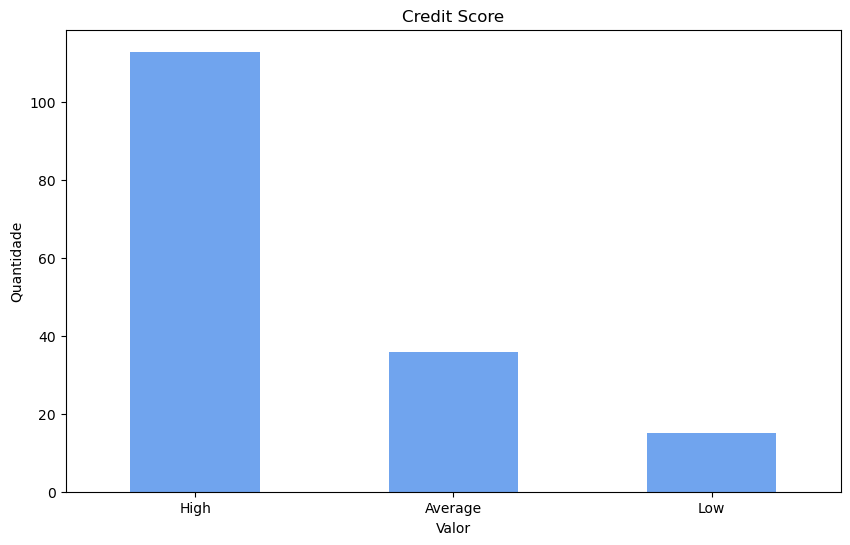

In [46]:
# Feito um Gráfico de Barras para Analisar a coluna 'Credit Score'
plt.figure(figsize=(10, 6))
df['Credit Score'].value_counts().plot(kind='bar', color="#70a4ee")
plt.title('Credit Score')
plt.xlabel('Valor')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.show()  # Exibe o Gráfico

In [47]:
# Replace 'Higt' para 1, 'Average' para 2 e 'Low' para 0 na coluna 'Credit Score'
df['Credit Score'] = df['Credit Score'].replace({'High': '1', 'Average': '2', 'Low': '0'})

In [48]:
# Transformando a váriavel em uma váriavel numérica
df['Credit Score'] = df['Credit Score'].astype(int)

In [49]:
df.dtypes

Age                   float64
Gender                 object
Income                float64
Education              object
Marital Status         object
Number of Children      int64
Home Ownership         object
Credit Score            int32
dtype: object

In [50]:
# Traduzindo colunas do Inglês para o português
df.rename(columns={'Age': 'idade', 'Income': 'salario_mensal', 'Gender': 'genero', 'Education': 'nivel_educacao', 'Marital Status': 'status_civil', 'Number of Children': 'qtd_filhos', 'Home': 'tipo_residencia', 'Credit Score': 'score_credito'}, inplace=True)

In [51]:
df.head()

,idade,genero,salario_mensal,nivel_educacao,status_civil,qtd_filhos,Home Ownership,score_credito
0,25.0,Female,5000000.0,Bachelor's Degree,Single,0,Rented,1
1,30.0,Male,10000000.0,Master's Degree,Married,2,Owned,1
2,35.0,Female,7500000.0,Doctorate,Married,1,Owned,1
3,40.0,Male,12500000.0,High School Diploma,Single,0,Owned,1
4,45.0,Female,10000000.0,Bachelor's Degree,Married,3,Owned,1


In [ ]:
df.to_csv('CREDIT_SCORE_PROJETO_PARTE2.csv', index=False)

# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

In [52]:
df.describe()

,idade,salario_mensal,qtd_filhos,score_credito
count,164.000000,1.640000e+02,164.000000,164.000000
mean,37.195122,8.376524e+06,0.652439,1.128049
std,7.586619,3.245731e+06,0.883346,0.544414
min,25.000000,2.500000e+06,0.000000,0.000000
25%,31.750000,5.750000e+06,0.000000,1.000000
50%,36.000000,8.375000e+06,0.000000,1.000000
75%,43.000000,1.050000e+07,1.000000,1.000000
max,53.000000,1.625000e+07,3.000000,2.000000


Já é possivel identificar possivel Outlier na categoria 'salario_mensal', pois tem valores diferentes no min do max.

In [53]:
#verificando quantidade de linhas com o dado igual a 0
(df['salario_mensal']).sum()

1373750000.0

In [54]:
(df['salario_mensal']).mean() * 100

837652439.0243902

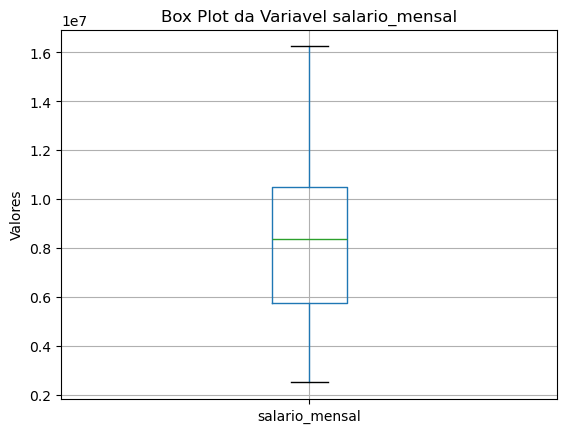

In [55]:
# Criação de Box Plot
df.boxplot(column='salario_mensal')
plt.title('Box Plot da Variavel salario_mensal')
plt.ylabel('Valores')
plt.show()

Analisando o BoxPlot dessa categoria, foi possivel analisar que os valores estão dentro das normalidades, sem presença de Outlier. 

In [56]:
#verificando quantidade de linhas com o dado igual a 0
(df['score_credito'] == 0).sum()

15

In [57]:
(df['score_credito']).mean() * 100

112.80487804878048

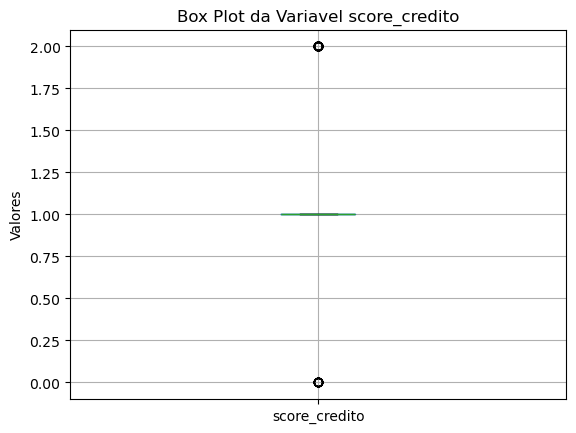

In [58]:
# Criação de Box Plot
df.boxplot(column='score_credito')
plt.title('Box Plot da Variavel score_credito')
plt.ylabel('Valores')
plt.show()

Analisando essa variavel, não tem como considerar essa coluna score_credito como um outlier porque os valores são: 0, 1 e 2. Então pode se analisar que os valore estão dentro das normalidades.

In [59]:
#verificando quantidade de linhas com o dado igual a 0
(df['qtd_filhos'] == 0).sum()

97

In [60]:
(df['qtd_filhos']).mean() * 100

65.2439024390244

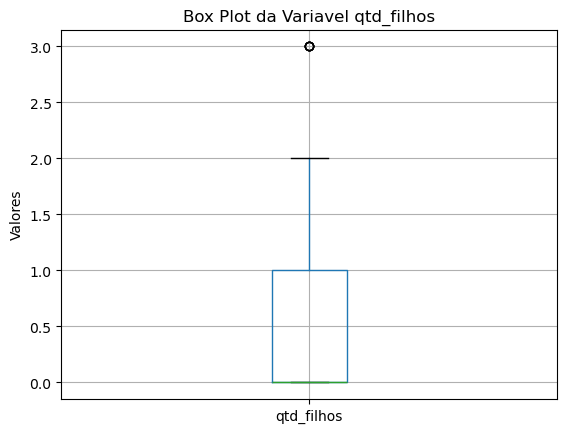

In [61]:
# Criação de Box Plot
df.boxplot(column='qtd_filhos')
plt.title('Box Plot da Variavel qtd_filhos')
plt.ylabel('Valores')
plt.show()

Não tem como considerar essa coluna score_credito como um outlier porque os valores são: 0, 1 e 2. Então pode se analisar que os valore estão dentro das normalidades.

In [62]:
#verificando quantidade de linhas com o dado igual a 0
(df['idade'] == 0 ).sum()

0

In [63]:
(df['idade']).mean() * 100

3719.512195121951

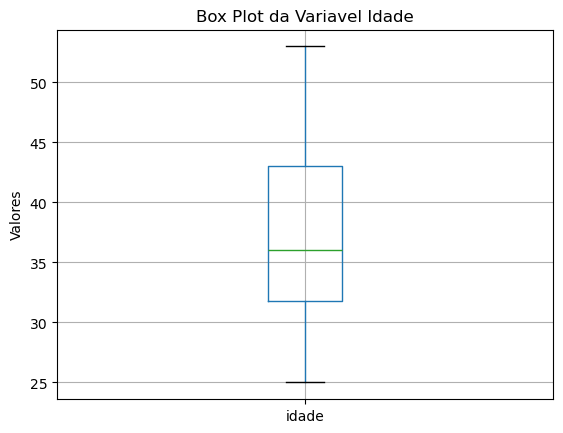

In [64]:
# Criação de Box Plot
df.boxplot(column='idade')
plt.title('Box Plot da Variavel Idade')
plt.ylabel('Valores')
plt.show()

Valores dentro das normalidades, sem presença de Outlier. 

**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

In [65]:
df.dtypes

idade             float64
genero             object
salario_mensal    float64
nivel_educacao     object
status_civil       object
qtd_filhos          int64
Home Ownership     object
score_credito       int32
dtype: object

Text(0, 0.5, 'Frequência')

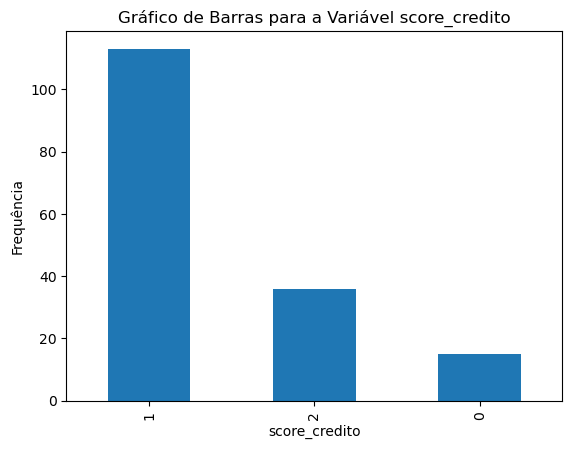

In [66]:
# Contagem dos valores da coluna de Genero
contagem_score_credito = df['score_credito'].value_counts()

# Calculando a porcentagem para que apareça no gráfico
porcentagem_score_credito = (contagem_score_credito / contagem_score_credito.sum()) * 100
ax = contagem_score_credito.plot(kind='bar')
plt.title('Gráfico de Barras para a Variável score_credito')
plt.xlabel('score_credito')
plt.ylabel('Frequência')

Foi analisado que não tem um balanceamento nesses numeros, o score '1' que equivale a um 'Bom' score de credito é muito maior que o '2 e 3' Medio e Baixo score.

C:\Users\kaiqu\AppData\Local\Temp\ipykernel_1000\4048588264.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')


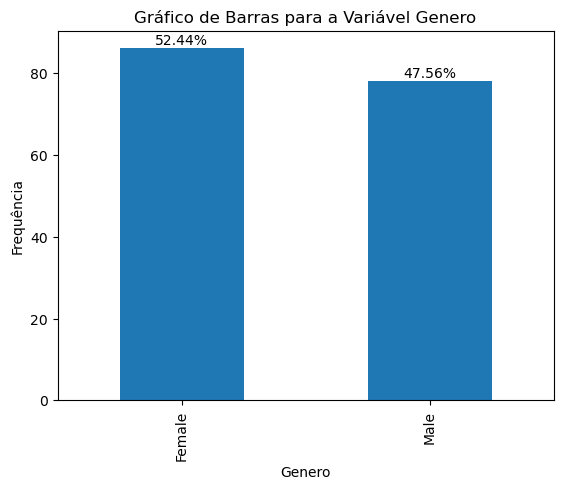

In [67]:
# Calculando as porcentagens
contagem = df['genero'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100


ax = contagem.plot(kind='bar')

# Adicionando porcentagem nas barras
for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Genero')
plt.xlabel('Genero')
plt.ylabel('Frequência')

plt.show()

Pode se analisar que o Quantidade de Mulheres é maior com 52% e os Homens equivale a 47%.

C:\Users\kaiqu\AppData\Local\Temp\ipykernel_1000\1684673278.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')


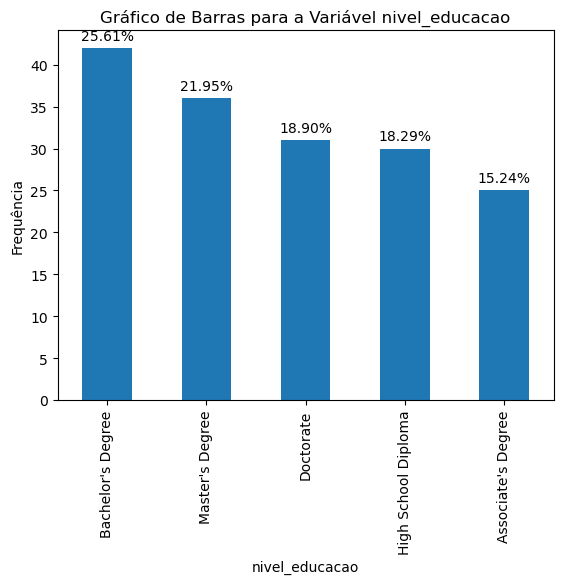

In [68]:
# Calculando as porcentagens
contagem = df['nivel_educacao'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100


ax = contagem.plot(kind='bar')

# Adicionando porcentagem nas barras
for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável nivel_educacao')
plt.xlabel('nivel_educacao')
plt.ylabel('Frequência')

plt.show()

Foi notado que a maior porcentagem equivale a 25% das pessoas que tem um diploma de bacharel.
A menor porcentagem equivale a 15% das pessoas que tem um diploma de associado.

C:\Users\kaiqu\AppData\Local\Temp\ipykernel_1000\2933465423.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')


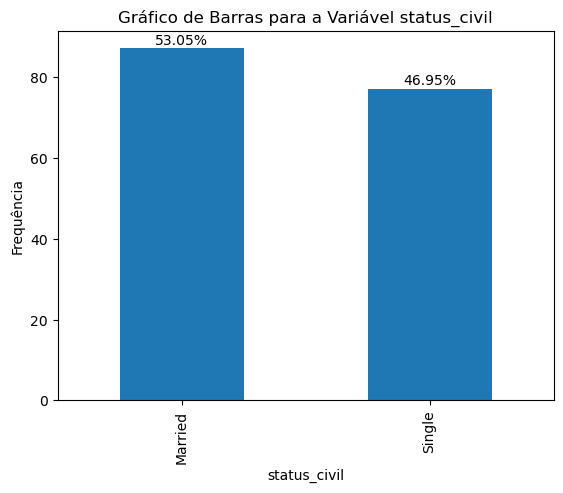

In [69]:
# Calculando as porcentagens
contagem = df['status_civil'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100


ax = contagem.plot(kind='bar')

# Adicionando porcentagem nas barras
for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável status_civil')
plt.xlabel('status_civil')
plt.ylabel('Frequência')

plt.show()

Notado que a maioria das pessoas são casadas, com a porcentagem de 53%. As pessoas solteiras equivalem a 47%.

C:\Users\kaiqu\AppData\Local\Temp\ipykernel_1000\2333038057.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')


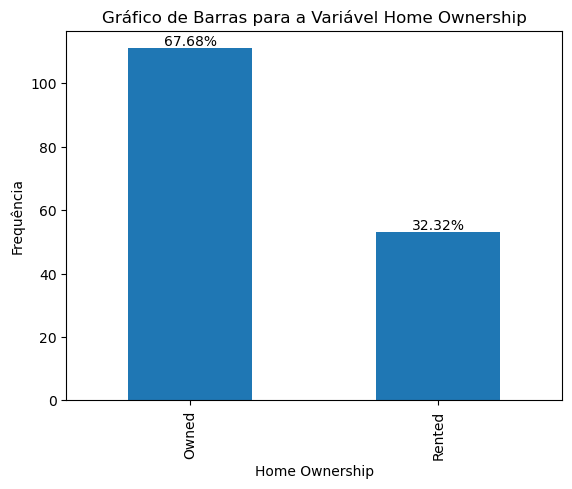

In [70]:
# Calculando as porcentagens
contagem = df['Home Ownership'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100


ax = contagem.plot(kind='bar')

# Adicionando porcentagem nas barras
for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Frequência')

plt.show()

Foi notado com 67% dos dados que a maioria das pessoas tem um tipo de residência comprada e 32% das pessoas tem um tipo de residência alugada.

**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

In [71]:
#score_credito
fig = px.box(df, y='score_credito', title='Box Plot da score_credito', labels={'score_credito': 'Valores'})
fig.show()

Olhando analiticamente não faz sentido removermos por ser um valor muito próximo aos demais.

**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



In [72]:
df.head()

,idade,genero,salario_mensal,nivel_educacao,status_civil,qtd_filhos,Home Ownership,score_credito
0,25.0,Female,5000000.0,Bachelor's Degree,Single,0,Rented,1
1,30.0,Male,10000000.0,Master's Degree,Married,2,Owned,1
2,35.0,Female,7500000.0,Doctorate,Married,1,Owned,1
3,40.0,Male,12500000.0,High School Diploma,Single,0,Owned,1
4,45.0,Female,10000000.0,Bachelor's Degree,Married,3,Owned,1


In [73]:
# Calcular a porcentagem de cada categoria
df_grouped = df.groupby(['idade', 'status_civil']).size().reset_index(name='count')
total_por_idade = df_grouped.groupby('idade')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_idade) * 100

# Cria gráfico de barras empilhadas
fig = px.bar(df_grouped, x='idade', y='percent', color='status_civil', barmode='stack',
             labels={'idade': 'idade', 'percent': 'Porcentagem', 'status_civil': 'status_civil'})

fig.update_layout(title='Relação entre idade e status_civil',
                  yaxis_title='Porcentagem',
                  legend_title='status_civil')
fig.show()

Pode se analisar que dos 25 anos aos 34 anos a maioria das pessoas sao solteiras, tem um leve desbalnceamento entre is 35 aos 40 anos, mas dos 45 anos em diante a grande maioria das pessoas sao casadas.

In [74]:
# Calcular a porcentagem de cada categoria
df_grouped = df.groupby(['score_credito', 'nivel_educacao']).size().reset_index(name='count')
total_por_score_credito = df_grouped.groupby('score_credito')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_score_credito) * 100

# Cria gráfico de barras empilhadas
fig = px.bar(df_grouped, x='score_credito', y='percent', color='nivel_educacao', barmode='stack',
             labels={'score_credito': 'score_credito', 'percent': 'Porcentagem', 'nivel_educacao': 'nivel_educacao'})

fig.update_layout(title='Relação entre score_credito e nivel_educacao',
                  yaxis_title='Porcentagem',
                  legend_title='nivel_educacao')
fig.show()

Foi analisado que 67% das pessoas com um score ruim tem foram ate o Ensino Medio e 33% das pessoas tem um Grau de Associado.

A maioria das pessoas com o score bom tem um nivel de Mestrado com media de 31%, 26% para Doutorados e 23% para Bacharelados.

Analisado o score mediano pode se dizer que a media fica com as pessoas com nivel de Grau de Associado e Bacharelado com uma porcentagem de 40% cada.

In [75]:
media_salario_mensal_por_idade = df.groupby('idade')['salario_mensal'].mean().reset_index()

fig = px.line(media_salario_mensal_por_idade, x='idade', y='salario_mensal',
              title='Relação entre idade e Média de Salário',
              labels={'idade': 'idade', 'salario_mensal': 'Média de salario_mensal'})

fig.show()

Analisando este grafico pode se dizer que pessoas com menos idade recebem um valor menor e pessoas com idade mais avancada recebem um valor maior. entao pode se dizer que com o passar da idade o salario das pessoas vai aumentando.

In [76]:
mediana = df.groupby('score_credito')['salario_mensal'].median().reset_index()
fig = px.bar(mediana, x='score_credito', y='salario_mensal',
             title='Média salario_mensal em relacao ao score_credito')
fig.show()

Diante deste grafico pode se analisar que pessoas que recebem mais tem um score bom.

Pessoas com um salario medio tem um score de credito mediano.

Pessoas que recebem menos tem um score de credito menor que as outras pessoas.

In [77]:
mediana = df.groupby('Home Ownership')['score_credito'].median().reset_index()
fig = px.bar(mediana, x='Home Ownership', y='score_credito',
             title='Média de Salario Mensal e Tipo de Residencia')
fig.show()

Clientes com Residencia comprada tendem a ter um score bom.

Clientes com Residencia alugada tendem a ter um score mediano.

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

A quantidade de filhos interfere no score de credito?

In [78]:
# Calcular a porcentagem de cada categoria
df_grouped = df.groupby(['score_credito', 'qtd_filhos']).size().reset_index(name='count')
total_por_score_credito = df_grouped.groupby('score_credito')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_score_credito) * 100

# Cria gráfico de barras empilhadas
fig = px.bar(df_grouped, x='score_credito', y='percent', color='qtd_filhos', barmode='stack',
             labels={'score_credito': 'score_credito', 'percent': 'Porcentagem', 'qtd_filhos': 'qtd_filhos'})

fig.update_layout(title='Relação entre score_credito e qtd_filhos',
                  yaxis_title='Porcentagem',
                  legend_title='qtd_filhos')
fig.show()

Feita a analise pode se dizer que a relacao na quantidade de filhos nao muda nada no score de credito dos clientes.

O genero impacta no score de credito?

In [79]:
# Calcular a porcentagem de cada categoria
df_grouped = df.groupby(['score_credito', 'genero']).size().reset_index(name='count')
total_por_score_credito = df_grouped.groupby('score_credito')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_score_credito) * 100

# Cria gráfico de barras empilhadas
fig = px.bar(df_grouped, x='score_credito', y='percent', color='genero', barmode='stack',
             labels={'score_credito': 'score_credito', 'percent': 'Porcentagem', 'genero': 'genero'})

fig.update_layout(title='Relação entre score_credito e genero',
                  yaxis_title='Porcentagem',
                  legend_title='genero')
fig.show()

Analisando o grafico pode se confirmar que 100% das mulheres tendem a ter um score ruim.

A media dos Homens e das Mulheres no score bom e mediano sao bem equilibrados.

O tipo de relacionamento tende a influenciar no tipo de score de credito?

In [80]:
# Calcular a porcentagem de cada categoria
df_grouped = df.groupby(['score_credito', 'status_civil']).size().reset_index(name='count')
total_por_score_credito = df_grouped.groupby('score_credito')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_score_credito) * 100

# Cria gráfico de barras empilhadas
fig = px.bar(df_grouped, x='score_credito', y='percent', color='status_civil', barmode='stack',
             labels={'score_credito': 'score_credito', 'percent': 'Porcentagem', 'status_civil': 'status_civil'})

fig.update_layout(title='Relação entre score_credito e status_civil',
                  yaxis_title='Porcentagem',
                  legend_title='status_civil')
fig.show()

100% dos clientes com um score ruim sao solteiras.

A grande maioria dos clientes com um score bom sao casadas, a media fica na faixa dos 75%.

Com 5%, clientes casados tem um score mediano contra 95% dos clientes solteiros.

# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

In [ ]:
# Plotando tabela
df.select_dtypes(include=['number']).corr()

,idade,salario_mensal,qtd_filhos,score_credito
idade,1.000000,0.621492,0.072432,-0.218494
salario_mensal,0.621492,1.000000,0.084547,-0.083698
qtd_filhos,0.072432,0.084547,1.000000,-0.136517
score_credito,-0.218494,-0.083698,-0.136517,1.000000


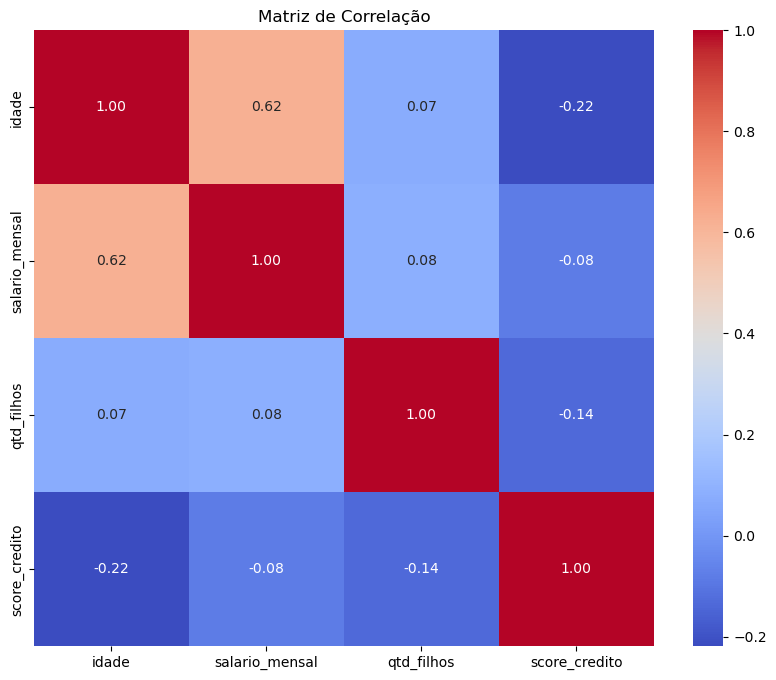

In [ ]:
# Plotando grafico da matriz
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plotar o mapa de calor da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação')
plt.show()

**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

Sim. 

Idade tem alta correlação com salário mensal e score de crédito, quantidade de filhos tem uma media com score de credito.

Faz sentido essas variáveis terem alta correlação, só confirma minha analise feita na plotagem dos gráficos acima.

**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

In [83]:
df.dtypes

idade             float64
genero             object
salario_mensal    float64
nivel_educacao     object
status_civil       object
qtd_filhos          int64
Home Ownership     object
score_credito       int32
dtype: object

In [84]:
# Realizando tratamento das colunas categoricas
from sklearn.preprocessing import LabelEncoder

# Criando uma instância do Label Encoder
label_encoder = LabelEncoder()

# Aplicando o Label Encoder para a coluna "genero" - ideal
df['genero_encoded'] = label_encoder.fit_transform(df['genero'])

# Aplicando o Label Encoder para a coluna "nivel_educacao" - ideal
df['nivel_educacao_encoded'] = label_encoder.fit_transform(df['nivel_educacao'])


# Aplicar o One Hot para a coluna "status_civil" - Nesse caso não criamos instância
df = pd.get_dummies(df, columns=['status_civil'], prefix='status_civil', drop_first=True)
#pd.get_dummies(df, columns=['status_civil'], prefix='status_civil'): Esta função transforma a coluna "status_civil" em várias colunas binárias (one-hot encoded)

# Aplicar o One Hot para a coluna "Home Ownership" - Nesse caso não criamos instância
df = pd.get_dummies(df, columns=['Home Ownership'], prefix='Home Ownership', drop_first=True)
#pd.get_dummies(df, columns=['Home Ownership'], prefix='Home Ownership'): Esta função transforma a coluna "Home Ownership" em várias colunas binárias (one-hot encoded)

print(df)

     idade  genero  salario_mensal       nivel_educacao  qtd_filhos  \
0     25.0  Female       5000000.0    Bachelor's Degree           0   
1     30.0    Male      10000000.0      Master's Degree           2   
2     35.0  Female       7500000.0            Doctorate           1   
3     40.0    Male      12500000.0  High School Diploma           0   
4     45.0  Female      10000000.0    Bachelor's Degree           3   
..     ...     ...             ...                  ...         ...   
159   29.0  Female       2750000.0  High School Diploma           0   
160   34.0    Male       4750000.0   Associate's Degree           0   
161   39.0  Female       6250000.0    Bachelor's Degree           2   
162   44.0    Male       8750000.0      Master's Degree           0   
163   49.0  Female       7750000.0            Doctorate           1   

     score_credito  genero_encoded  nivel_educacao_encoded  \
0                1               0                       1   
1                1     

In [85]:
df.dtypes

idade                     float64
genero                     object
salario_mensal            float64
nivel_educacao             object
qtd_filhos                  int64
score_credito               int32
genero_encoded              int32
nivel_educacao_encoded      int32
status_civil_Single          bool
Home Ownership_Rented        bool
dtype: object

In [ ]:
# Transformado 'bool' em 'int'
for column in df.columns:
    if df[column].dtype == 'bool':
        df[column] = df[column].astype(int)
print(df)

     idade  genero  salario_mensal       nivel_educacao  qtd_filhos  \
0     25.0  Female       5000000.0    Bachelor's Degree           0   
1     30.0    Male      10000000.0      Master's Degree           2   
2     35.0  Female       7500000.0            Doctorate           1   
3     40.0    Male      12500000.0  High School Diploma           0   
4     45.0  Female      10000000.0    Bachelor's Degree           3   
..     ...     ...             ...                  ...         ...   
159   29.0  Female       2750000.0  High School Diploma           0   
160   34.0    Male       4750000.0   Associate's Degree           0   
161   39.0  Female       6250000.0    Bachelor's Degree           2   
162   44.0    Male       8750000.0      Master's Degree           0   
163   49.0  Female       7750000.0            Doctorate           1   

     score_credito  genero_encoded  nivel_educacao_encoded  \
0                1               0                       1   
1                1     

In [87]:
# Vamos dropar as colunas com os atributos categóricos
df = df.drop(['genero'], axis=1)

df = df.drop(['nivel_educacao'], axis=1)
print(df)

     idade  salario_mensal  qtd_filhos  score_credito  genero_encoded  \
0     25.0       5000000.0           0              1               0   
1     30.0      10000000.0           2              1               1   
2     35.0       7500000.0           1              1               0   
3     40.0      12500000.0           0              1               1   
4     45.0      10000000.0           3              1               0   
..     ...             ...         ...            ...             ...   
159   29.0       2750000.0           0              0               0   
160   34.0       4750000.0           0              2               1   
161   39.0       6250000.0           2              1               0   
162   44.0       8750000.0           0              1               1   
163   49.0       7750000.0           1              1               0   

     nivel_educacao_encoded  status_civil_Single  Home Ownership_Rented  
0                         1                    1 

**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

In [ ]:
# Plotando variaveis para analise
df.corr()

,idade,salario_mensal,qtd_filhos,score_credito,genero_encoded,nivel_educacao_encoded,status_civil_Single,Home Ownership_Rented
idade,1.000000,0.621492,0.072432,-0.218494,0.204661,0.171525,-0.449115,-0.628042
salario_mensal,0.621492,1.000000,0.084547,-0.083698,0.495738,0.369449,-0.471004,-0.704928
qtd_filhos,0.072432,0.084547,1.000000,-0.136517,-0.442139,0.047311,-0.696984,-0.497129
score_credito,-0.218494,-0.083698,-0.136517,1.000000,0.247729,-0.334424,0.205756,0.293384
genero_encoded,0.204661,0.495738,-0.442139,0.247729,1.000000,0.248671,0.278362,-0.031519
nivel_educacao_encoded,0.171525,0.369449,0.047311,-0.334424,0.248671,1.000000,-0.067797,-0.397043
status_civil_Single,-0.449115,-0.471004,-0.696984,0.205756,0.278362,-0.067797,1.000000,0.708374
Home Ownership_Rented,-0.628042,-0.704928,-0.497129,0.293384,-0.031519,-0.397043,0.708374,1.000000


Podemos confirmar que o genero, tipo de educação, status civil e tipo de residencia tem correlação com a nossa base preditora 'score_credito'.

**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [90]:
# Separar os dados em features (X) e o alvo (y)
X = df.drop('score_credito', axis=1)  # Considerando que 'score_credito' é a coluna a ser predita
y = df['score_credito']

In [91]:
# Separar os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# O parâmetro 'test_size' determina a proporção dos dados que serão separados para teste (25% neste exemplo)
# O parâmetro 'random_state' é usado para garantir que a divisão seja reproduzível

In [93]:
X_train

,idade,salario_mensal,qtd_filhos,genero_encoded,nivel_educacao_encoded,status_civil_Single,Home Ownership_Rented
141,26.0,4500000.0,0,0,0,1,1
117,29.0,2750000.0,0,0,3,1,1
93,25.0,6250000.0,0,0,1,1,1
133,29.0,6800000.0,2,0,2,0,0
36,31.0,6500000.0,0,1,1,1,1
...,...,...,...,...,...,...,...
71,46.0,9750000.0,1,0,3,0,0
106,32.0,5750000.0,0,1,0,1,1
14,36.0,7000000.0,2,0,1,0,0
92,36.0,8500000.0,1,0,2,0,0


In [94]:
X_test

,idade,salario_mensal,qtd_filhos,genero_encoded,nivel_educacao_encoded,status_civil_Single,Home Ownership_Rented
135,25.0,5500000.0,0,0,1,1,1
115,48.0,8750000.0,1,0,2,0,0
131,26.0,5500000.0,1,0,1,0,0
55,39.0,6250000.0,2,0,1,0,0
95,35.0,9000000.0,1,0,2,0,0
29,25.0,5500000.0,0,0,1,1,1
157,48.0,8250000.0,1,0,2,0,0
51,48.0,8250000.0,1,0,2,0,0
101,36.0,9500000.0,2,0,4,0,0
145,36.0,9500000.0,1,0,3,0,0


In [95]:
y_train

141    2
117    0
93     2
133    2
36     2
      ..
71     1
106    2
14     1
92     1
102    1
Name: score_credito, Length: 123, dtype: int32

In [96]:
y_test

135    2
115    1
131    2
55     1
95     1
29     2
157    1
51     1
101    1
145    1
19     2
85     0
15     1
66     1
24     0
30     1
132    1
105    0
152    1
16     1
75     1
18     0
12     0
9      1
31     1
155    1
98     1
56     1
134    1
160    2
139    1
78     1
60     1
84     1
2      1
94     1
45     1
42     2
69     1
153    0
26     1
Name: score_credito, dtype: int32

In [97]:
print("Tamanho de X_train:", X_train.shape)

Tamanho de X_train: (123, 7)


In [98]:
print("Tamanho de X_test:", X_test.shape)

Tamanho de X_test: (41, 7)


In [99]:
print("Tamanho de y_train:", y_train.shape)

Tamanho de y_train: (123,)


In [100]:
print("Tamanho de y_test:", y_test.shape)

Tamanho de y_test: (41,)


**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

<Axes: xlabel='score_credito'>

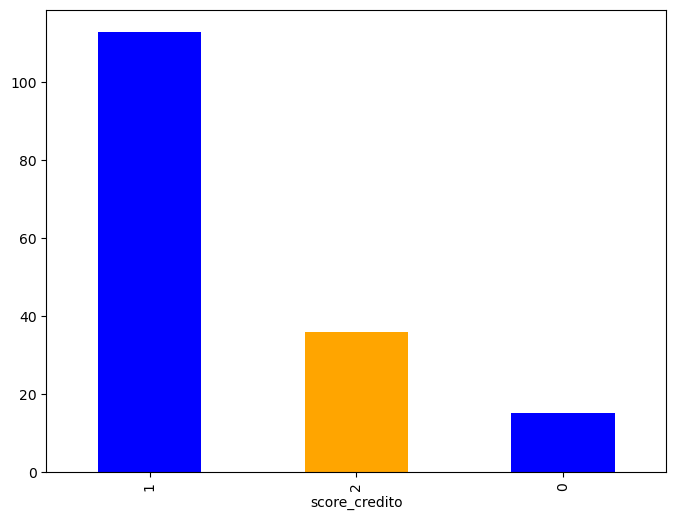

In [101]:
churn_counts = df['score_credito'].value_counts()
plt.figure(figsize=(8, 6))
churn_counts.plot(kind='bar', color=['blue', 'orange'])

In [102]:
# Calcular e imprimir as porcentagens dos valores na coluna 'score_credito'
print((df['score_credito'].value_counts(normalize=True) * 100))

score_credito
1    68.902439
2    21.951220
0     9.146341
Name: proportion, dtype: float64


Temos apenas 20% dos dados classificados como score mediano e 10% dos dados como score ruim e faz sentido o número de clientes com um score bom, mediano e ruim.
Entretanto isso pode indicar que se nosso modelo simplesmente "chutasse" que todos nossos clientes teriam um bom score de credito e ele acertaria 70% dos casos e seria bem avaliado. Porém esse valor não é real para nós, pois nos interessa acertar o score de credito, por conta disso é interessante balancearmos nossos dados em casos como esses.

**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

In [104]:
# Criar uma instância do SMOTE
smote = SMOTE(random_state=42)

# Aplicar o SMOTE aos dados de treinamento (X_train, y_train)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verificar a distribuição das classes após o balanceamento
print("Distribuição das classes após o balanceamento:")
print(y_train_balanced.value_counts())

Distribuição das classes após o balanceamento:
score_credito
2    84
0    84
1    84
Name: count, dtype: int64


c:\Users\kaiqu\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "c:\Users\kaiqu\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\kaiqu\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kaiqu\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\kaiqu\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(

In [105]:
train_balance = y_train_balanced.value_counts()
print("Balanceamento em y_train:")
print(train_balance)

Balanceamento em y_train:
score_credito
2    84
0    84
1    84
Name: count, dtype: int64


In [106]:
y_train_balanced.to_csv('y_train_balanced.csv', index=False)

In [107]:
X_train_balanced.to_csv('X_train_balanced.csv', index=False)

In [108]:
y_test.to_csv('y_test.csv', index=False)

In [109]:
X_test.to_csv('X_test.csv', index=False)